group-SELFIES
===

Move to the downloaded folder and configure group-SELFIES

In [ ]:
%cd /content/drive/MyDrive/Lamole

/content/drive/MyDrive/Lamole


In [ ]:
%cd ./group-selfies-main

/content/drive/MyDrive/Lamole/group-selfies-main


In [ ]:
%pip install . #torch-geometric

Processing /content/drive/MyDrive/Lamole/group-selfies-main
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 23.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for group-selfies: filename=group_selfies-1.0.0-py3-none-any.whl size=37879 sha256=00541b2ed81aede56b52b158eeb19cf39a68df3047768e7c216263c5d920d331
  Stored in directory: /root/.cache/pip/wheels/e5/48/9f/2918a9ae247a7ff08c2df57b2ead4991da1cd2e457bda71974
  Created wheel for global_chem: filename=global_chem-1.9.4-py3-none-any.whl size=183895 sha256=f3d255b36e02078867f36a2ea8209a0842e854a300f2265e2ad37cff0f71e0f4
  Stored in directory: /root/.cache/pip/wheels/9a/59/f1/54d1059a3c71873fa5a753958cb641cfa1de932c69426f6a9e
Successfully built group-selfies global_chem


Define your own functional groups and group grammar (also update the `group_edge_num_mapping` when adding new group)

In [ ]:
from group_selfies import (
    Group,
    GroupGrammar
)

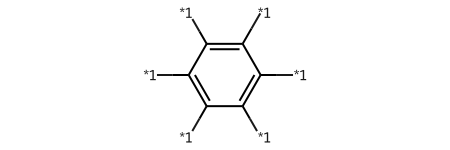

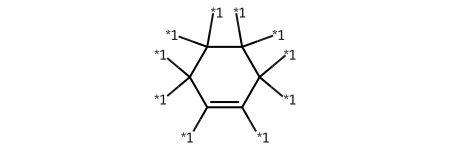

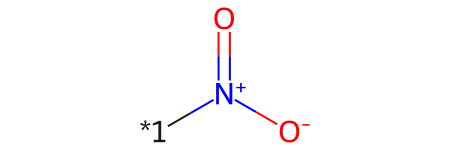

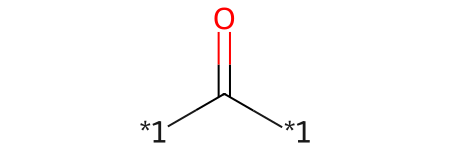

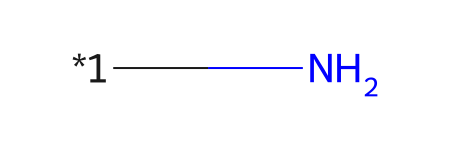

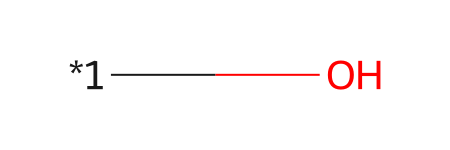

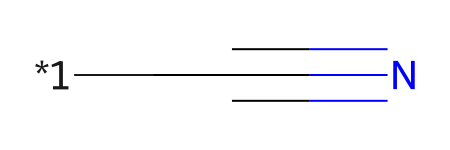

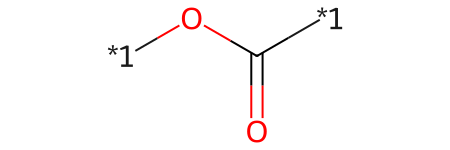

{'benzene': <Group benzene C1(*1)=C(*1)-C(*1)=C(*1)-C(*1)=C-1*1>,
 'nitro': <Group nitro O=[N+](-[O-])*1>,
 'carbonyl': <Group carbonyl C(*1)(*1)(=O)>,
 'amido': <Group amido N*1>,
 'hydroxyl': <Group hydroxyl O*1>,
 'cyano': <Group cyano N#C*1>,
 'carboxyl': <Group carboxyl O=C(-O*1)*1>,
 'cyclohexene': <Group cyclohexene C(*1)1=C(*1)C(*1)(*1)C(*1)(*1)C(*1)(*1)C(*1)(*1)1>}

In [ ]:
g_benzene = Group('benzene', 'C1=CC=CC=C1', all_attachment=True)
display(g_benzene.mol)

g_cyclohexene = Group('cyclohexene', 'C(*1)1=C(*1)C(*1)(*1)C(*1)(*1)C(*1)(*1)C(*1)(*1)1')
display(g_cyclohexene.mol)

g_nitro = Group('nitro', 'O=[N+]([O-])', all_attachment=True)
display(g_nitro.mol)

g_carbonyl = Group('carbonyl', 'C(*1)(*1)(=O)')
display(g_carbonyl.mol)

g_amido = Group('amido', 'N(*2)', all_attachment=True)
display(g_amido.mol)

g_hydroxyl = Group('hydroxyl', 'O(*1)', all_attachment=True)
display(g_hydroxyl.mol)

g_cyano = Group('cyano', 'C#N', all_attachment=True)
display(g_cyano.mol)

g_carboxyl = Group('carboxyl', 'C(=O)O', all_attachment=True)
display(g_carboxyl.mol)

my_grammar = GroupGrammar([g_benzene, g_nitro, g_carbonyl,
                           g_amido, g_hydroxyl, g_cyano, g_carboxyl,
                           g_cyclohexene])
my_grammar.vocab

In [ ]:
group_edge_num_mapping = {
    'benzene': 6,
    'nitro': 2,
    'carbonyl': 1,
    'amido': 2,
    'hydroxyl': 1,
    'cyano': 1,
    'carboxyl': 2,
    'cyclohexene': 6
}
groups = my_grammar.vocab.keys()
group_label_mapping = dict.fromkeys(groups, 0)
init_value = 0
for key in group_label_mapping.keys():
    group_label_mapping[key] = init_value
    init_value += 1
other_group_label = max(group_label_mapping.values())+1

group_label_to_edge_num = {}
for key in group_label_mapping.keys():
    label = group_label_mapping[key]
    edge_num = group_edge_num_mapping[key]
    group_label_to_edge_num[label] = edge_num

Fine-tune model
===

In [ ]:
%cd /content/drive/MyDrive/Lamole

/content/drive/MyDrive/Lamole


Example

In [ ]:
from main import model_train
seeds = [1324,2145,2757,1297,952]
for seed in seeds:
    dataset = "MUTAG"
    best_acc, avg_auc = model_train(seed, dataset, group_label_mapping, group_label_to_edge_num)

In [ ]:
from main import model_train
seeds = [1854,793,2634,777,491]
for seed in seeds:
    dataset = "PTC_FM"
    best_acc, avg_auc = model_train(seed, dataset, group_label_mapping, group_label_to_edge_num)

In [ ]:
from main import model_train
seeds = [1324,2145,2757,181]
for seed in seeds:
    dataset = "PTC_FR"
    best_acc, avg_auc = model_train(seed, dataset, group_label_mapping, group_label_to_edge_num)

In [ ]:
from main import model_train
seeds = [1161,1932,1641]
for seed in seeds:
    dataset = "PTC_MM"
    best_acc, avg_auc = model_train(seed, dataset, group_label_mapping, group_label_to_edge_num)

In [ ]:
from main import model_train
seeds = [2100,1575,1018,2448,2060,269]
for seed in seeds:
    dataset = "PTC_MR"
    best_acc, avg_auc = model_train(seed, dataset, group_label_mapping, group_label_to_edge_num)